# üöö **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deber√° entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el men√∫ "Archivo" -> "Imprimir".

2. El enlace p√∫blico de Google Colab. Para ello, vaya al bot√≥n de compartir y cambie la configuraci√≥n de compartici√≥n a "Cualquier persona con el enlace".

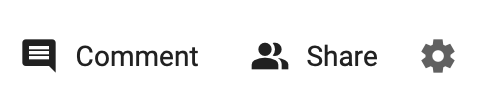

# **LABORATORIO DE REGRESI√ìN: PREDICCI√ìN DEL N√öMERO DE USUARIOS ACTIVOS EN UNA PLATAFORMA**

En este laboratorio queremos predecir el n√∫mero de usuarios activos en una plataforma en l√≠nea seg√∫n la hora del d√≠a a partir de una serie de mediciones que disponemos en una base de datos. Para esto usaremos m√©todos de regresi√≥n.

# **Visualizaci√≥n del Dataset**

Importamos las bibliotecas necesarias: pandas para cargar el archivo CSV en un DataFrame de pandas y matplotlib.pyplot para trazar el gr√°fico.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos del archivo CSV en un DataFrame de pandas usando la funci√≥n pd.read_csv(). El archivo CSV debe tener dos columnas llamadas "hour" y "users" para que el c√≥digo funcione correctamente. El archivo CSV se carga en un DataFrame llamado df

In [41]:
# Cargar los datos del archivo CSV en un DataFrame de pandas

url = 'https://raw.githubusercontent.com/mtgca/datasets_public/main/active_users_data.csv'
df = pd.read_csv(url)

#df = pd.read_csv('data.csv')


Usamos la funci√≥n plt.scatter() para crear el gr√°fico de dispersi√≥n. Le pasamos la columna "hour" como eje x y la columna "users" como eje y. El resultado es un gr√°fico de puntos en el que cada punto representa una combinaci√≥n de valores de hora y usuarios. Usamos las funciones plt.xlabel() y plt.ylabel() para establecer etiquetas en los ejes x e y del gr√°fico, respectivamente. Finalmente, usamos la funci√≥n plt.show() para mostrar el gr√°fico en la pantalla.

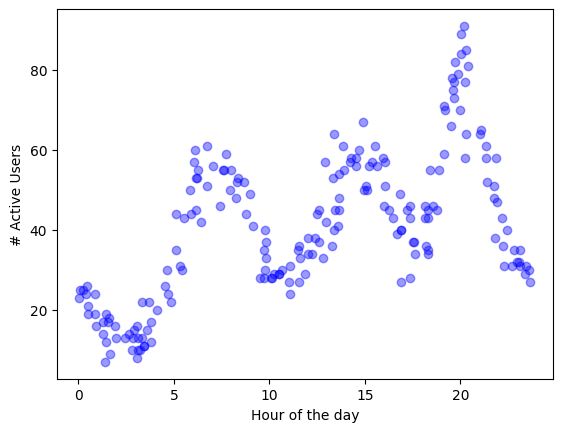

In [42]:
# Crea un scatter plot de "users" vs "hour"
plt.scatter(df['hour'], df['users'], color='b', alpha=0.4, label='Data')

# Etiqueta los ejes
plt.xlabel('Hour of the day')
plt.ylabel('# Active Users')

# Muestra el plot
plt.show()

# **Modelo de regresi√≥n lineal**

En este apartado implementaremos regresi√≥n lineal sin regularizaci√≥n. Dado que el dataset muestra una relaci√≥n no lineal (ver visualizaci√≥n arriba), es necesario utilizar regresi√≥n polin√≥mica.

Primero, se importan las bibliotecas necesarias, que incluyen:

* PolynomialFeatures: una funci√≥n para generar caracter√≠sticas polin√≥micas para
un conjunto de datos.
* StandardScaler: una funci√≥n para escalar los datos a un rango com√∫n.
* LinearRegression: una funci√≥n para ajustar un modelo lineal a los datos.
* Pipeline: una funci√≥n para concatenar varias transformaciones en un estimador.
mean_squared_error: una funci√≥n para calcular el error cuadr√°tico medio.
* r2_score: una funci√≥n para calcular el coeficiente de determinaci√≥n R^2.
* train_test_split: una funci√≥n para dividir los datos en conjuntos de entrenamiento y prueba.

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np # matlab de python


A continuaci√≥n, se define una funci√≥n llamada calculate_regression_metrics que toma un modelo, un conjunto de datos x y una variable objetivo ytrue, y devuelve la ra√≠z cuadrada del error cuadr√°tico medio (RMSE) y el coeficiente de determinaci√≥n R^2. Esta funci√≥n se utilizar√° m√°s adelante para calcular las m√©tricas de error para el conjunto de entrenamiento y prueba.

In [44]:
# funci√≥n auxiliar para calcular el RMSE y R2 de un modelo de regresi√≥n
def calculate_regression_metrics(model, x, ytrue):
    ypred = model.predict(x)
    rmse = np.sqrt(mean_squared_error(ytrue, ypred))
    r2 = r2_score(ytrue, ypred)
    return rmse, r2

Luego, los datos se dividen en conjuntos de entrenamiento y prueba utilizando la funci√≥n train_test_split.

In [45]:
# divisi√≥n aleatoria de datos en conjunto de entrenamiento y conjunto de text
split_seed = 11  # para reproducibilidad
train_frac = 0.8 #80 % para train, 20% para test (random)
train_df, test_df = train_test_split(df, train_size=train_frac, random_state=split_seed)
print(train_df.head())

          hour  users
163  14.287734     58
137  19.130252     59
30    0.479183     26
103  13.637112     54
98   13.289953     36


A continuaci√≥n, se ajusta un modelo de regresi√≥n polin√≥mica de grado N (ver variable degree) al conjunto de entrenamiento utilizando la funci√≥n Pipeline.



In [46]:
# Ajustar en el conjunto de entrenamiento
degree = 100 # Grado del polinomio
model = Pipeline([ #REPRESENTAR
                    ('poly', PolynomialFeatures(degree)), #1era etapa
                    ('scal', StandardScaler()), #2do paso zscore
                    ('reg', LinearRegression()) #3er paso, reg. lin normal
                ])
model.fit(train_df[['hour']], train_df['users'])

Pipeline(steps=[('poly', PolynomialFeatures(degree=100)),
                ('scal', StandardScaler()), ('reg', LinearRegression())])

Luego, se utilizan la funci√≥n calculate_regression_metrics y los conjuntos de entrenamiento y prueba para calcular el RMSE y el R^2 para el modelo ajustado en ambos conjuntos.

In [47]:
# Calcular error  MSE y R2 en el conjunto de entrenamiento
rmse_train, r2_train = calculate_regression_metrics(model, train_df[['hour']], train_df['users'])
print("RMSE train: ", rmse_train, "R-squared train:", r2_train)

# Calcular error  MSE y R2 en el conjunto de test
rmse_test, r2_test = calculate_regression_metrics(model, test_df[['hour']], test_df['users'])
print("RMSE test: ", rmse_test, "R-squared test:", r2_test)

RMSE train:  5.236770149169356 R-squared train: 0.9229747711632643
RMSE test:  6.691110944141828 R-squared test: 0.8203011179087847


Despu√©s, se utiliza el modelo ajustado para predecir los valores de la variable objetivo en el conjunto de prueba.

In [48]:
# Predecir en el conjunto de test
pred_test = model.predict(test_df[['hour']])
print(pred_test)

[40.16477709 37.15608233 50.86637698 54.76643039 43.13997825 39.92779194
 43.12935434 53.89577516 56.656242   33.83728753 23.45292626 26.53222619
 75.16306223 12.76711999 18.98409644 48.4897915  44.91998935 44.99640199
 38.28585015 37.33727437 38.32115136 66.13865596 30.99906884 12.49990807
 50.46113549 28.54879723 51.4174199  51.38347588 80.75605037 13.41517602
 35.75924378 42.78964369 31.11830102 30.67985497 79.99634248 28.29031335
 52.68079339 39.99137078 25.3662716  80.73631302]


Finalmente, graficamos el conjunto de entrenamiento y en rojo el modelo entrenado

d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


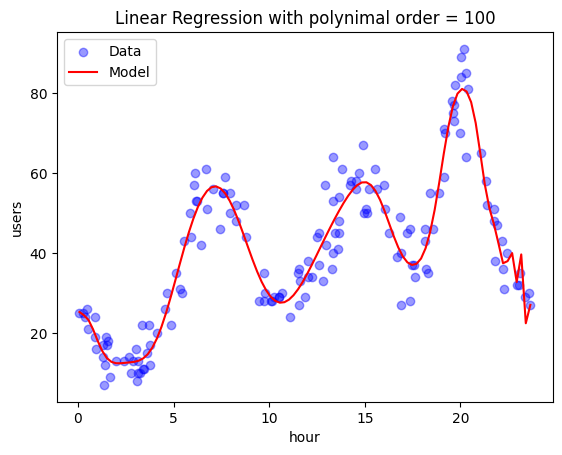

In [49]:

# Generar una secuencia de valores para hour entre 0 y 24 horas
hour_seq = np.linspace(train_df['hour'].min(), train_df['hour'].max(), num=100).reshape(-1, 1)

# Predecir los valores de users para la secuencia de valores de hour
users_pred = model.predict(hour_seq)

# Graficar los valores de hour en el eje x y los valores predichos de users en el eje y
plt.scatter(train_df['hour'], train_df['users'], color='b', alpha=0.4, label='Data')
plt.plot(hour_seq, users_pred, color='red', label='Model')
plt.xlabel('hour')
plt.ylabel('users')
plt.title("Linear Regression with polynimal order = "+str(degree))
plt.legend()
plt.show()

## **Selecci√≥n del mejor modelo: Optimizando el hiperpar√°metro "grado del polinomio"**


Este c√≥digo utiliza varias bibliotecas de Python, principalmente de Scikit-learn y Matplotlib, para ajustar un modelo de regresi√≥n lineal con caracter√≠sticas polinomiales a un conjunto de datos.

1. **Importaciones**:
   - `GridSearchCV` de `sklearn.model_selection`: Utilizado para realizar una b√∫squeda exhaustiva sobre un rango especificado de hiperpar√°metros de un modelo.
   - `matplotlib.pyplot` como `plt` y `numpy` como `np`: Bibliotecas para manejar gr√°ficos y operaciones num√©ricas, respectivamente. Aunque se importan, no se utilizan directamente en el fragmento de c√≥digo proporcionado.

2. **Creaci√≥n del Diccionario de Par√°metros (`param_grid`)**:
   - Se define un diccionario con los hiperpar√°metros que se quieren ajustar. Aqu√≠, se est√° ajustando el grado del polinomio (`poly__degree`) que var√≠a desde 1 hasta 100.

3. **Definici√≥n de la Pipeline (`model`)**:
   - Se utiliza una `Pipeline` para encadenar varios pasos de procesamiento y modelado:
     - `PolynomialFeatures()` para generar caracter√≠sticas polinomiales a partir de los datos de entrada.
     - `StandardScaler()` para estandarizar las caracter√≠sticas generadas, es decir, ajustarlas para que tengan media 0 y varianza 1.
     - `LinearRegression()` para aplicar un modelo de regresi√≥n lineal.

4. **Inicializaci√≥n de `GridSearchCV`**:
   - Se crea una instancia de `GridSearchCV`, especificando el modelo (pipeline), el diccionario de par√°metros, y varias opciones adicionales:
     - `cv=5` indica que se debe usar una validaci√≥n cruzada de 5-folds.
     - `scoring='neg_mean_squared_error'` establece el error cuadr√°tico medio negativo como la m√©trica para evaluar el modelo. El signo negativo se usa porque GridSearchCV busca maximizar un score, mientras que queremos minimizar el error.
     - `return_train_score=True` indica que los scores de entrenamiento tambi√©n deben ser incluidos en los resultados.
     - `verbose=1` activa mensajes de progreso (cuanto m√°s alto es el n√∫mero, m√°s mensajes se muestran).

5. **Ajuste de `GridSearchCV` al Conjunto de Entrenamiento**:
   - `grid_search.fit(train_df[['hour']], train_df['users'])`: Aqu√≠ se ajusta el `GridSearchCV` a los datos de entrenamiento. Se supone que `train_df` es un DataFrame que contiene al menos dos columnas: `hour` y `users`. `hour` se utiliza como caracter√≠stica y `users` como la variable objetivo (por ejemplo, n√∫mero de usuarios activos en un sitio web durante ciertas horas).

Este script es especialmente √∫til para modelar relaciones no lineales entre las caracter√≠sticas y la variable de respuesta, optimizando simult√°neamente los hiperpar√°metros del modelo. Una vez completado el ajuste, el modelo con el mejor rendimiento (menor error cuadr√°tico medio) se puede seleccionar e inspeccionar utilizando los m√©todos y atributos de `grid_search`.

In [50]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario de par√°metros a probar
param_grid = {'poly__degree': np.arange(1, 101)}

# Definir la pipeline
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scal', StandardScaler()),
    ('reg', LinearRegression())
])

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid,
                           cv=5,# kfold cross val
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=4)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train_df[['hour']], train_df['users'])




Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END poly__degree=1;, score=(train=-244.084, test=-138.842) total time=   0.0s
[CV 2/5] END poly__degree=1;, score=(train=-227.244, test=-207.464) total time=   0.0s
[CV 3/5] END poly__degree=1;, score=(train=-205.330, test=-298.856) total time=   0.0s
[CV 4/5] END poly__degree=1;, score=(train=-206.478, test=-291.545) total time=   0.0s
[CV 5/5] END poly__degree=1;, score=(train=-228.789, test=-203.915) total time=   0.0s
[CV 1/5] END poly__degree=2;, score=(train=-215.735, test=-128.003) total time=   0.0s
[CV 2/5] END poly__degree=2;, score=(train=-201.720, test=-182.340) total time=   0.0s
[CV 3/5] END poly__degree=2;, score=(train=-186.709, test=-249.410) total time=   0.0s
[CV 4/5] END poly__degree=2;, score=(train=-190.954, test=-230.118) total time=   0.0s
[CV 5/5] END poly__degree=2;, score=(train=-188.105, test=-247.459) total time=   0.0s
[CV 1/5] END poly__degree=3;, score=(train=-214.201, test=-118.435)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scal', StandardScaler()),
                                       ('reg', LinearRegression())]),
             param_grid={'poly__degree': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=4)

A continuaci√≥n, este fragmento de c√≥digo proporciona una visualizaci√≥n detallada de los resultados obtenidos de una b√∫squeda de hiperpar√°metros utilizando `GridSearchCV` para un modelo de regresi√≥n con caracter√≠sticas polinomiales.

1. **Obtener los Resultados de la B√∫squeda de Par√°metros**:
   - `results = grid_search.cv_results_` guarda en `results` todos los resultados de la validaci√≥n cruzada para cada combinaci√≥n de par√°metros probados durante la b√∫squeda de `GridSearchCV`. Esta informaci√≥n incluye, entre otras cosas, el score medio de entrenamiento y validaci√≥n para cada configuraci√≥n de par√°metros.

2. **Obtener el Mejor Modelo Encontrado por GridSearchCV**:
   - `best_model = grid_search.best_estimator_` recupera el mejor modelo encontrado por `GridSearchCV` basado en la m√©trica de evaluaci√≥n especificada (en este caso, el error cuadr√°tico medio negativo).

3. **Extraer los Errores de Entrenamiento y Validaci√≥n Cruzada**:
   - `train_errors = np.sqrt(-results['mean_train_score'])` y `val_errors = np.sqrt(-results['mean_test_score'])` calculan la ra√≠z del error cuadr√°tico medio (RMSE) para los scores de entrenamiento y validaci√≥n, respectivamente. Los valores est√°n negativos en `results` porque el `scoring` especificado fue `neg_mean_squared_error`, por lo que se necesita convertirlos a positivo y luego tomar la ra√≠z cuadrada para obtener el RMSE.

4. **Obtener los Grados del Polinomio Probados**:
   - `degrees = param_grid['poly__degree']` extrae los grados del polinomio que fueron probados en la b√∫squeda de par√°metros.

5. **Graficar los Errores de Entrenamiento y Validaci√≥n Cruzada**:
   - Aqu√≠ se crea un gr√°fico que compara el RMSE de entrenamiento y validaci√≥n en funci√≥n del grado polinomial:
     - Se utiliza un gr√°fico de escala logar√≠tmica tanto para el eje x (grados del polinomio) como para el eje y (RMSE) para manejar mejor el amplio rango de valores y visualizar las tendencias m√°s claramente.
     - Se a√±aden etiquetas, t√≠tulo, una leyenda, y se habilita la cuadr√≠cula para mejorar la legibilidad del gr√°fico.

6. **Destacar el Mejor Modelo**:
   - `best_degree = best_model.named_steps['poly'].degree` recupera el grado del polinomio del mejor modelo encontrado.
   - `plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best model at Polynomial Degree: {best_degree}')` a√±ade una l√≠nea vertical en el gr√°fico para destacar el grado polinomial del mejor modelo.

El uso de este c√≥digo es ideal para visualizar c√≥mo el grado del polinomio afecta el rendimiento del modelo y para identificar un equilibrio adecuado entre el ajuste a los datos de entrenamiento y la generalizaci√≥n a nuevos datos, indicado por los errores de validaci√≥n.

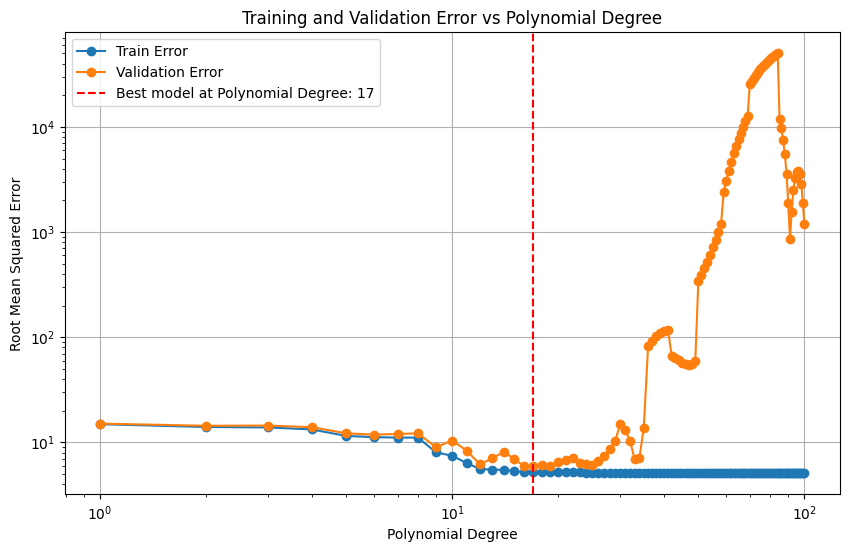

In [51]:
# Obtener los resultados de la b√∫squeda de par√°metros
results = grid_search.cv_results_

# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Extraer los errores de entrenamiento y validaci√≥n cruzada
train_errors = np.sqrt(-results['mean_train_score'])
val_errors = np.sqrt(-results['mean_test_score'])

# Obtener los grados del polinomio probados
degrees = param_grid['poly__degree']

# Graficar los errores de entrenamiento y validaci√≥n cruzada
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, val_errors, label='Validation Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Validation Error vs Polynomial Degree')

plt.grid(True)

# Obtener el grado del polinomio seleccionado por el mejor modelo
best_degree = best_model.named_steps['poly'].degree
# Dibujar una l√≠nea vertical en el grado del polinomio seleccionado
plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best model at Polynomial Degree: {best_degree}')
plt.legend()
plt.show()

Finalmente, en la siguiente celda de c√≥digo evaluamos el modelo en el conjunto de test:

1. **Obtener el Mejor Modelo**:
   - `best_model = grid_search.best_estimator_` recupera el mejor modelo del objeto `GridSearchCV`. Este modelo es el que tuvo el mejor desempe√±o en la validaci√≥n cruzada seg√∫n la m√©trica especificada.

2. **Ajustar el Mejor Modelo al Conjunto de Entrenamiento**:
   - `best_model.fit(train_df[['hour']], train_df['users'])` ajusta el mejor modelo a los datos de entrenamiento. Aqu√≠, se asume que `train_df` es un DataFrame que contiene al menos dos columnas: `hour` y `users`. La columna `hour` se utiliza como caracter√≠stica y `users` como la variable objetivo.  En un escenario pr√°ctico, este paso ser√≠a redundante porque 'GridSearchCV' ya ajusta el mejor modelo.Sin embargo, se incluye aqu√≠ con fines did√°cticos para demostrar c√≥mo se realiza el ajuste de un modelo.


3. **Hacer Predicciones con el Mejor Modelo**:
   - `predictions = best_model.predict(test_df[['hour']])` utiliza el modelo ya ajustado para hacer predicciones sobre un conjunto de prueba separado, `test_df`.

4. **Evaluar el Rendimiento del Modelo en el Conjunto de Prueba**:
   - `rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])` calcula las m√©tricas de rendimiento del modelo en el conjunto de prueba.



In [52]:
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Ajustar el mejor modelo al conjunto de entrenamiento
# En un escenario pr√°ctico, este paso ser√≠a redundante porque 'GridSearchCV' ya ajusta el mejor modelo.
# Sin embargo, se incluye aqu√≠ con fines did√°cticos para demostrar c√≥mo se realiza el ajuste de un modelo.
best_model.fit(train_df[['hour']], train_df['users'])

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(test_df[['hour']])

# Evaluar el rendimiento del modelo en el conjunto de prueba
rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])
print("RMSE test (best model): ", rmse_test,  'active users')
print("R-squared test (best model):", r2_test)


RMSE test (best model):  6.5069152405581265 active users
R-squared test (best model): 0.8300585917389962


## ‚úÖ **Actividad Regresi√≥n Lineal**

Discuta brevemente sobre la figura "grado del polinomio" vs RMSE arriba graficada para la regresi√≥n lineal.


# **Modelo de Regresi√≥n de Ridge**




Ahora, vamos a abordar el problema usando Regresi√≥n lineal de Ridge. Recuerde que la regresi√≥n de Ridge incluye un hiperpar√°metro llamado hiperpar√°metro de regularizaci√≥n que controla el overfitting. El hiperpar√°metro de regularizaci√≥n var√≠a entre 0 e infinito. Normalmente, lambda tiene valores peque√±os como veremos en este laboratorio. Valores grande de lambda pueden causar "underfitting" mientras que valores cercanos a cero pueden causar overfitting.

Primero se importa el modelo de regresi√≥n Ridge desde sklearn.linear_model.


In [53]:

from sklearn.linear_model import Ridge # L2 norm regularizer

Luego, se establece el valor de regularizaci√≥n lambda_value en 1
Se crea adem√°s un modelo de regresi√≥n Ridge utilizando un Pipeline de tres pasos:
1. PolynomialFeatures(degree=75) crea caracter√≠sticas polin√≥micas de grado 75 a partir de los datos de entrada.
2. StandardScaler() estandariza los datos para que tengan media cero y varianza unitaria.
3. Ridge(alpha=lambda_value) ajusta el modelo de regresi√≥n Ridge utilizando el valor de regularizaci√≥n lambda_value. Aunque en clase este hiperpar√°metro lo definimos con la letra griega lambda, es importante mencionar que en la librer√≠a sklearn, este hiperpar√°metro lo definen con la letra griega alfa.

In [54]:
lambda_value = 1e-18
# Ajustar en el conjunto de entrenamiento
model_ridge = Pipeline([
                        ('poly', PolynomialFeatures(degree=75)), #NO MODIFICAR
                        ('scal', StandardScaler()),
                        ('reg', Ridge(alpha=lambda_value))
                        ])


Finalmente, el siguiente c√≥digo ajusta el modelo de Ridge, calcula las m√©tricas correspondientes y presenta el modelo en un gr√°fico. Note que este c√≥digo es similar al anteriormente usado por lo que no entraremos en detalle en su funcionamiento. Consulte en la secci√≥n anterior para m√°s detalles.

MSE train:  5.251266768694174 R-squared train: 0.9225477327718498
MSE test:  6.281197199379752 R-squared test: 0.8416442744994903


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


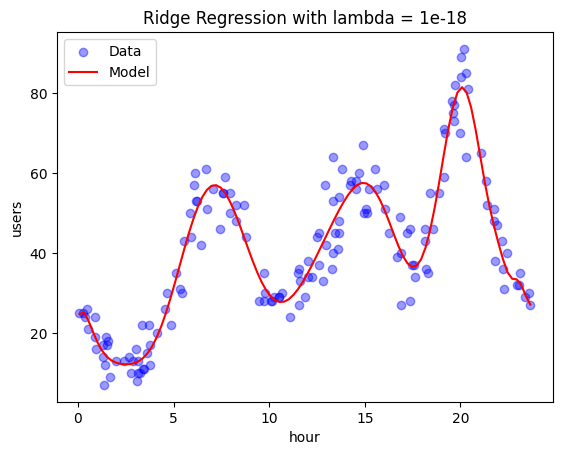

In [55]:

model_ridge.fit(train_df[['hour']], train_df['users'])

# Calcular error  MSE y R2 en el conjunto de entrenamiento
rmse_train, r2_train = calculate_regression_metrics(model_ridge, train_df[['hour']], train_df['users'])
print("MSE train: ", rmse_train, "R-squared train:", r2_train)

# Calcular error  MSE y R2 en el conjunto de test
rmse_test, r2_test = calculate_regression_metrics(model_ridge, test_df[['hour']], test_df['users'])
print("MSE test: ", rmse_test, "R-squared test:", r2_test)

# Predecir en el conjunto de test
pred_test = model_ridge.predict(test_df[['hour']])

# Generar una secuencia de valores para hour entre 0 y 24 horas
hour_seq = np.linspace(train_df['hour'].min(), train_df['hour'].max(), num=100).reshape(-1, 1)

# Predecir los valores de users para la secuencia de valores de hour
users_pred = model_ridge.predict(hour_seq)

# Graficar los valores de hour en el eje x y los valores predichos de users en el eje y
plt.scatter(train_df['hour'], train_df['users'], color='b', alpha=0.4, label='Data')
plt.plot(hour_seq, users_pred, color='red', label='Model')
plt.xlabel('hour')
plt.ylabel('users')
plt.title("Ridge Regression with lambda = "+str(lambda_value))
plt.legend()
plt.show()

## **Selecci√≥n del mejor modelo de Ridge: Optimizando el hiperpar√°metro $\lambda$**



El c√≥digo a continuaci√≥n realiza un proceso de ajuste y evaluaci√≥n de un modelo de regresi√≥n Ridge, similar al ejercicio previo con regresi√≥n lineal, pero incorporando regularizaci√≥n L2 a trav√©s del hiperpar√°metro lambda ($\lambda$). Aqu√≠, se establece un grado polinomial alto (55) para las caracter√≠sticas de entrada, con el prop√≥sito de observar el efecto de la regularizaci√≥n Ridge en un escenario donde es probable que se produzca sobreajuste debido a la complejidad del modelo.

El c√≥digo sigue estos pasos clave:

1. **Configuraci√≥n de la B√∫squeda de Hiperpar√°metros**: Se define un rango para el hiperpar√°metro de regularizaci√≥n ($\lambda$), `alpha` en Scikit-learn) que se quiere optimizar, utilizando valores desde $10^{-10}$ hasta $10^{3}$.

2. **Definici√≥n del Modelo**: Se crea una `Pipeline` que incluye transformaciones polin√≥micas de grado 55 y estandarizaci√≥n de las caracter√≠sticas, seguido por el modelo Ridge, que utiliza regularizaci√≥n L2.

3. **B√∫squeda con GridSearchCV**: Se utiliza `GridSearchCV` para encontrar el valor √≥ptimo de $\lambda$ mediante validaci√≥n cruzada con 2 folds, evaluando los modelos con el error cuadr√°tico medio negativo.

4. **Entrenamiento y Validaci√≥n**: El mejor modelo obtenido de `GridSearchCV` es entrenado y validado, extrayendo los errores de entrenamiento y validaci√≥n para su an√°lisis.

5. **Visualizaci√≥n**: Se grafican los errores de entrenamiento y validaci√≥n en funci√≥n del hiperpar√°metro $\lambda$, con escalas logar√≠tmicas en ambos ejes, para mostrar c√≥mo var√≠a el rendimiento con diferentes niveles de regularizaci√≥n.

6. **Selecci√≥n y Evaluaci√≥n del Mejor Modelo**: Se destaca el mejor valor de $\lambda$ encontrado y se eval√∫a el rendimiento del modelo seleccionado en un conjunto de prueba, mostrando el RMSE y el coeficiente de determinaci√≥n  $R^2$.

El prop√≥sito educativo del c√≥digo es demostrar el impacto de la regularizaci√≥n en un modelo propenso al sobreajuste y c√≥mo la optimizaci√≥n de $\lambda$ puede mejorar la capacidad de generalizaci√≥n del modelo. La regularizaci√≥n L2 pretende penalizar los coeficientes m√°s grandes, forzando al modelo a mantenerlos peque√±os, lo que suele resultar en una mejor generalizaci√≥n y en la prevenci√≥n del sobreajuste en modelos altamente complejos.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END reg__alpha=0.0001;, score=(train=-83.418, test=-83.195) total time=   0.0s
[CV 2/5] END reg__alpha=0.0001;, score=(train=-77.247, test=-99.793) total time=   0.0s
[CV 3/5] END reg__alpha=0.0001;, score=(train=-78.084, test=-128.274) total time=   0.0s
[CV 4/5] END reg__alpha=0.0001;, score=(train=-70.284, test=-70.053) total time=   0.0s
[CV 5/5] END reg__alpha=0.0001;, score=(train=-81.089, test=-88.257) total time=   0.0s
[CV 1/5] END reg__alpha=0.000774263682681127;, score=(train=-116.919, test=-129.252) total time=   0.0s
[CV 2/5] END reg__alpha=0.000774263682681127;, score=(train=-112.054, test=-136.355) total time=   0.0s
[CV 3/5] END reg__alpha=0.000774263682681127;, score=(train=-105.450, test=-181.546) total time=   0.0s
[CV 4/5] END reg__alpha=0.000774263682681127;, score=(train=-111.891, test=-725.529) total time=   0.0s
[CV 5/5] END reg__alpha=0.000774263682681127;, score=(train=-117.966, test=-117.59

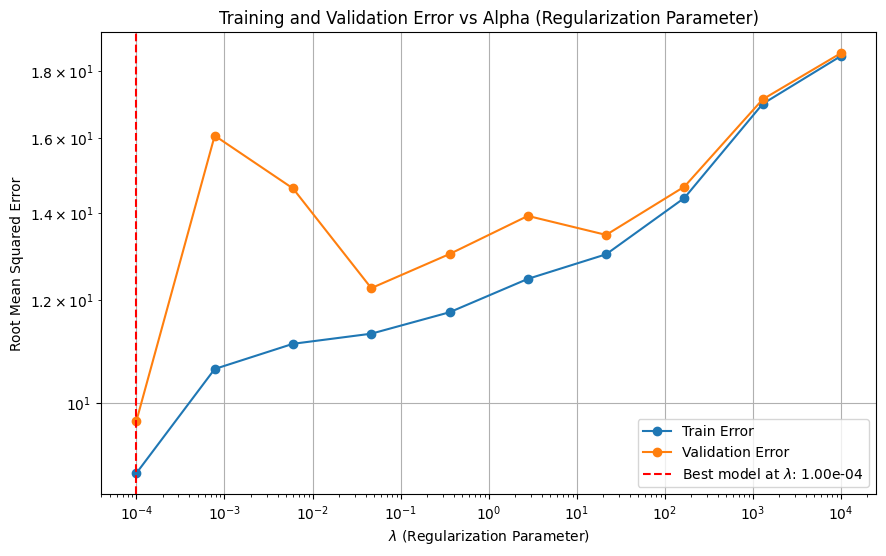

RMSE test (best model):  7.836041636238315 active users
R-squared test (best model): 0.7535423044374956


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario de par√°metros a probar
param_grid = {'reg__alpha': np.logspace(-10, 3, 100)} # Rango de valores para alpha (par√°metro de regularizaci√≥n)

# Definir la pipeline
model = Pipeline([
    ('poly', PolynomialFeatures(degree=55)), # Se fija el grado del polinomio en 75
    ('scal', StandardScaler()),
    ('reg', Ridge()) # Se cambia a Ridge
])

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid,
                           cv=2, # kfold cross validation
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=4)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train_df[['hour']], train_df['users'])

# Obtener los resultados de la b√∫squeda de par√°metros
results = grid_search.cv_results_

# Obtener el mejor modelo encontrado por GridSearchCV
# En un escenario pr√°ctico, este paso ser√≠a redundante porque 'GridSearchCV' ya ajusta el mejor modelo.
# Sin embargo, se incluye aqu√≠ con fines did√°cticos para demostrar c√≥mo se realiza el ajuste de un modelo.
best_model = grid_search.best_estimator_

# Extraer los errores de entrenamiento y validaci√≥n cruzada
train_errors = np.sqrt(-results['mean_train_score'])
val_errors = np.sqrt(-results['mean_test_score'])

# Obtener los valores de alpha probados
alphas = param_grid['reg__alpha']

# Graficar los errores de entrenamiento y validaci√≥n cruzada
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train Error', marker='o')
plt.plot(alphas, val_errors, label='Validation Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$ (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Validation Error vs Alpha (Regularization Parameter)')

plt.grid(True)

# Obtener el valor de alpha seleccionado por el mejor modelo
best_alpha = best_model.named_steps['reg'].alpha
# Dibujar una l√≠nea vertical en el valor de alpha seleccionado
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_alpha:.2e}')
plt.legend()
plt.show()

# Ajustar el mejor modelo al conjunto de entrenamiento
best_model.fit(train_df[['hour']], train_df['users'])

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(test_df[['hour']])

# Evaluar el rendimiento del modelo en el conjunto de prueba
rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])
print("RMSE test (best model): ", rmse_test, 'active users')
print("R-squared test (best model):", r2_test)


## ‚úÖ **Actividad Regresi√≥n de Ridge**

 Discuta brevemente sobre la figura $\lambda$ vs RMSE arriba graficada para la regresi√≥n de Ridge

> üñä `Desarrollar aqu√≠ su actividad`

La figura descrita en el espacio anterior, se oberva que cae en un under-fiting al incremento del alpha tanto como las muestras de entrenamiento y las de tests crecen en su error.
Ademas se puede observar que las si el alpha es demasiado peque√±o las muestras de train tienen un valor de error muy alto, se debe escojer un alpha intermedio segun lo caracteristica que muestra la figura 

## ‚úÖ **Actividad Regresi√≥n de Lasso y de ElasticNet**

**Parte 1:**

En esta actividad usted realizar√° una investigaci√≥n bibliogr√°fica corta sobre los siguientes algoritmos de regresi√≥n que son complementarios a los estudiados en clase:
1. Lasso
2. ElasticNet

Su consulta debe resumir las diferencias entre las 2 formas de regresi√≥n (Lasso y ElascticNet) y la regresi√≥n de Ridge. Liste adem√°s qu√© funciones de sklearn las implementan. Observe que esta actividad no requiere codificaci√≥n. Lecturas recomendadas:

https://bookdown.org/ssjackson300/Machine-Learning-Lecture-Notes/ridge-regression.html

https://glmnet.stanford.edu/articles/glmnet.html


Finalmente, con base en su consulta, considere la siguiente figura en la que el eje X representa el par√°metro de regularizaci√≥n L2 y el eje Y muestra los valores de los par√°metros Theta de un modelo de regresi√≥n asociados a cada caracter√≠stica (e.g., Income, Limit, Rating,etc.). ¬øA qu√© tipo de regresi√≥n (Ridge o Lasso) es m√°s probable que se relacione esta figura?  ¬øPor qu√©?

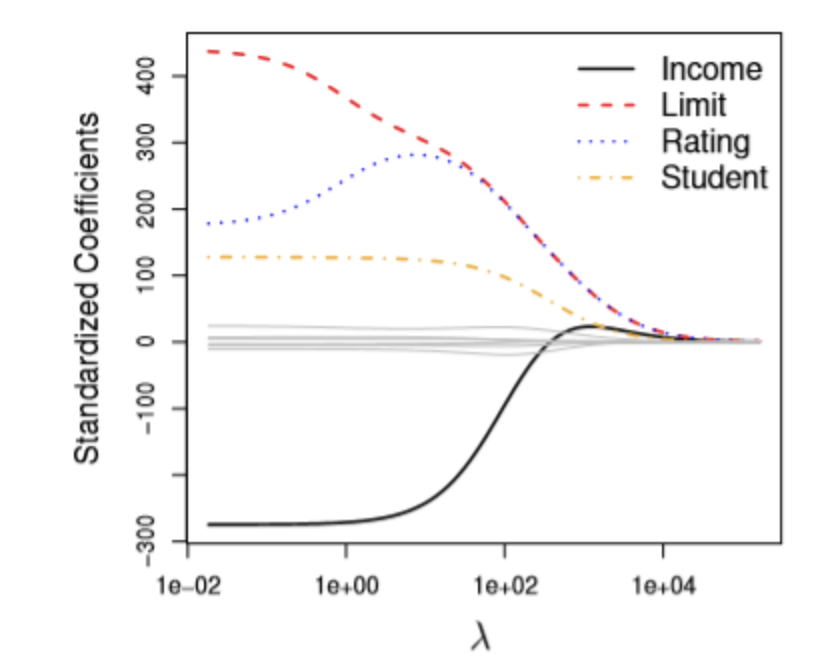

**Parte 2 (OPCIONAL) :**

1. Implemente Lasso para el dataset de esta notebook. Optimice los hiperpar√°metros de Lasso. Incluya las gr√°ficas que se realizan arriba para Ridge.
2. Implemente ElasticNet para el dataset de esta notebook. Optimice los hiperpar√°metros de ElasticNet.  Incluya las gr√°ficas que se realizan arriba para Ridge.




> üñä `Desarrollar aqu√≠ su actividad`

d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+03, tolerance: 3.277e+00
  model = cd_fast.enet_coordinate_descent(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.866e+03, tolerance: 2.400e+00
  model = cd_fast.enet_coordinate_descent(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+03, toleranc

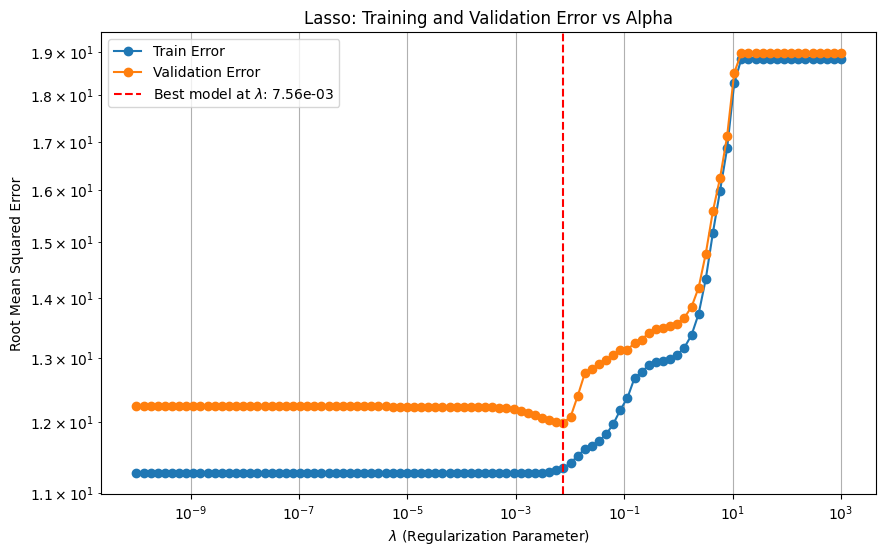

Lasso - RMSE test: 10.127732800103855 active users
Lasso - R^2 test: 0.5883070943492124


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.531e+02, tolerance: 5.697e+00
  model = cd_fast.enet_coordinate_descent(


In [66]:
from sklearn.linear_model import Lasso

# Grid para Lasso
param_grid_lasso = {'reg__alpha': np.logspace(-10, 3, 100)}

# Pipeline para Lasso
lasso_model = Pipeline([
    ('poly', PolynomialFeatures(degree=55)),
    ('scal', StandardScaler()),
    ('reg', Lasso(max_iter=10000))  # Lasso puede necesitar m√°s iteraciones
])

# GridSearchCV para Lasso
grid_lasso = GridSearchCV(lasso_model, param_grid_lasso,
                          cv=2,
                          scoring='neg_mean_squared_error',
                          return_train_score=True,
                          verbose=0)

# Ajustar el modelo
grid_lasso.fit(train_df[['hour']], train_df['users'])

# Obtener resultados
results_lasso = grid_lasso.cv_results_
best_lasso = grid_lasso.best_estimator_

# Extraer errores
train_errors_lasso = np.sqrt(-results_lasso['mean_train_score'])
val_errors_lasso = np.sqrt(-results_lasso['mean_test_score'])
alphas_lasso = param_grid_lasso['reg__alpha']
best_alpha_lasso = best_lasso.named_steps['reg'].alpha

# Gr√°fica
plt.figure(figsize=(10, 6))
plt.plot(alphas_lasso, train_errors_lasso, label='Train Error', marker='o')
plt.plot(alphas_lasso, val_errors_lasso, label='Validation Error', marker='o')
plt.axvline(x=best_alpha_lasso, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_alpha_lasso:.2e}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$ (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error')
plt.title('Lasso: Training and Validation Error vs Alpha')
plt.grid(True)
plt.legend()
plt.show()

# Evaluaci√≥n
best_lasso.fit(train_df[['hour']], train_df['users'])
predictions_lasso = best_lasso.predict(test_df[['hour']])
rmse_lasso, r2_lasso = calculate_regression_metrics(best_lasso, test_df[['hour']], test_df['users'])
print("Lasso - RMSE test:", rmse_lasso, "active users")
print("Lasso - R^2 test:", r2_lasso)


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+03, tolerance: 3.277e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.866e+03, tolerance: 2.400e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

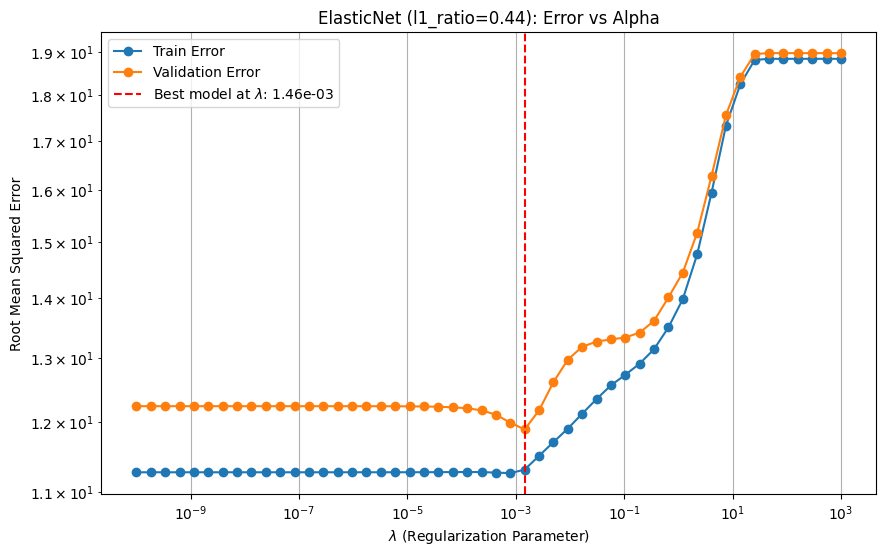

ElasticNet - RMSE test: 9.944561927678404 active users
ElasticNet - R^2 test: 0.6030642396263982


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.977e+03, tolerance: 5.697e+00
  model = cd_fast.enet_coordinate_descent(


In [67]:
from sklearn.linear_model import ElasticNet

# Grid para ElasticNet (alpha y l1_ratio)
param_grid_en = {
    'reg__alpha': np.logspace(-10, 3, 50),
    'reg__l1_ratio': np.linspace(0, 1, 10)  # l1_ratio: 0 = Ridge, 1 = Lasso
}

# Pipeline
enet_model = Pipeline([
    ('poly', PolynomialFeatures(degree=55)),
    ('scal', StandardScaler()),
    ('reg', ElasticNet(max_iter=10000))
])

# GridSearchCV para ElasticNet
grid_enet = GridSearchCV(enet_model, param_grid_en,
                         cv=2,
                         scoring='neg_mean_squared_error',
                         return_train_score=True,
                         verbose=0)

# Ajustar el modelo
grid_enet.fit(train_df[['hour']], train_df['users'])

# Resultados
results_en = grid_enet.cv_results_
best_enet = grid_enet.best_estimator_

# Extraer errores para cada alpha (√∫nicamente si l1_ratio fijo; para gr√°fico m√°s claro)
# Por simplicidad, se fija l1_ratio al mejor para la curva
best_l1_ratio = best_enet.named_steps['reg'].l1_ratio
errors_alpha_en = []
for alpha in param_grid_en['reg__alpha']:
    idx = np.where((results_en['param_reg__alpha'].data == alpha) & 
                   (results_en['param_reg__l1_ratio'].data == best_l1_ratio))[0]
    if len(idx):
        idx = idx[0]
        errors_alpha_en.append((
            alpha,
            np.sqrt(-results_en['mean_train_score'][idx]),
            np.sqrt(-results_en['mean_test_score'][idx])
        ))

alphas_en, train_errors_en, val_errors_en = zip(*errors_alpha_en)
best_alpha_en = best_enet.named_steps['reg'].alpha

# Gr√°fica
plt.figure(figsize=(10, 6))
plt.plot(alphas_en, train_errors_en, label='Train Error', marker='o')
plt.plot(alphas_en, val_errors_en, label='Validation Error', marker='o')
plt.axvline(x=best_alpha_en, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_alpha_en:.2e}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$ (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error')
plt.title(f'ElasticNet (l1_ratio={best_l1_ratio:.2f}): Error vs Alpha')
plt.grid(True)
plt.legend()
plt.show()

# Evaluaci√≥n
best_enet.fit(train_df[['hour']], train_df['users'])
predictions_enet = best_enet.predict(test_df[['hour']])
rmse_enet, r2_enet = calculate_regression_metrics(best_enet, test_df[['hour']], test_df['users'])
print("ElasticNet - RMSE test:", rmse_enet, "active users")
print("ElasticNet - R^2 test:", r2_enet)


# ‚úÖ **Actividad: Conclusiones**

Concluya aqu√≠ el trabajo realizado en este laboratorio. Recuerde que las conclusiones deben incluir sus ideas e impresiones de lo estudiado en este laboratorio.


> üñä `Desarrollar aqu√≠ su actividad`